# 0. Setup Paths

In [26]:
import os
# !pip install --upgrade pip
# !pip install -U numpy

In [27]:
CUSTOM_MODEL_NAME = 'my_efficientdet_'
PRETRAINED_MODEL_NAME = 'efficientdet_d2_coco17_tpu-32'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [28]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [29]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [30]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [9]:
# https://www.tensorflow.org/install/source_windows

In [21]:
if os.name=='nt':
#     !pip install wget
    import wget

In [48]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
#     !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
error: Setup script exited with error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/


Obtaining file:///D:/Object%20Detection/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [24]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')

# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.4: D:\Object Detection\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-07-30 11:51:00.762538: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0730 11:51:00.786464 20776 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Buildin

In [12]:
# !pip install protobuf==3.20.3 --upgrade
# !pip install tf-models-official
# !pip install pyyaml

In [13]:
# !pip install tensorflow --upgrade

In [14]:
# !pip uninstall protobuf 
# !pip install protobuf==3.20.x 

In [31]:
import object_detection

In [50]:
# !pip list

In [8]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 62929273 / 62929273        1 file(s) moved.


x efficientdet_d2_coco17_tpu-32/
x efficientdet_d2_coco17_tpu-32/checkpoint/
x efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
x efficientdet_d2_coco17_tpu-32/checkpoint/checkpoint
x efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.index
x efficientdet_d2_coco17_tpu-32/pipeline.config
x efficientdet_d2_coco17_tpu-32/saved_model/
x efficientdet_d2_coco17_tpu-32/saved_model/saved_model.pb
x efficientdet_d2_coco17_tpu-32/saved_model/assets/
x efficientdet_d2_coco17_tpu-32/saved_model/variables/
x efficientdet_d2_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
x efficientdet_d2_coco17_tpu-32/saved_model/variables/variables.index


# 2. Create Label Map

In [32]:
# labels = [{'name':'eyes', 'id':1}, {'name':'nose', 'id':2}, {'name':'mouth', 'id':3}, {'name':'mouth_open', 'id':4},{'name':'ears', 'id':5},{'name':'head', 'id':6},{'name':'face', 'id':7},{'name':'hand', 'id':8}]
labels = [{'name':'eyes', 'id':1}, {'name':'nose', 'id':2}, {'name':'mouth', 'id':3}, {'name':'ears', 'id':4}]
# labels = [{'name':'face', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [31]:
# OPTIONAL IF RUNNING ON COLAB
# ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
# if os.path.exists(ARCHIVE_FILES):
#   !tar -zxvf {ARCHIVE_FILES}

In [32]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [33]:
# !pip install pandas
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [33]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [34]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [35]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [36]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 768
       max_dimension: 768
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "ssd_efficientnet-b2_bifpn_keras"
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
         }
       }
       activation: SWISH
       batch_norm {
         decay: 0.9900000095367432
         scale: true
         epsilon: 0.0010000000474974513
       }
       force_use_bias: true
     }
     bifpn {
       min_level: 3
       max_level: 7
       num_iterations: 5
       num_filters: 112
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 1.0
       x_scale: 1.0
       height_scale: 1.0
       width_scale: 1.0
     }
   }
   matcher {
     argmax_mat

In [37]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [38]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [39]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [15]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [52]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [53]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [54]:
!{command}

Traceback (most recent call last):
  File "D:\Object Detection\TFODCourse\Tensorflow\models\research\object_detection\model_main_tf2.py", line 31, in <module>
    from object_detection import model_lib_v2
  File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\eval_util.py", line 35, in <module>
    from object_detection.metrics import coco_evaluation
  File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\metrics\coco_evaluation.py", line 25, in <module>
    from object_detection.metrics import coco_tools
  File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\metrics\coco_tools.py", line 51, in <module>
    from pycocotools import c

# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [40]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [41]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [42]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [44]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'image_0e37738eb4594bb9ae9d20cc53883d64.jpg')

In [45]:
IMAGE_PATH 
# "D:\Object Detection\TFODCourse\Tensorflow\workspace\images\test\image_de71fadb36e34b9b997ce38c496a9f2d.jpg"

'Tensorflow\\workspace\\images\\test\\image_0e37738eb4594bb9ae9d20cc53883d64.jpg'

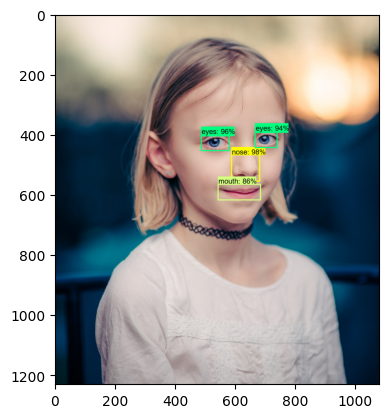

In [46]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
import cv2
import numpy as np
import tensorflow as tf
from object_detection.utils import label_map_util, visualization_utils as viz_utils
from matplotlib import pyplot as plt

# Function to perform object detection on an image
def perform_object_detection_on_image(image_path, detect_fn, category_index):
    img = cv2.imread(image_path)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'] + label_id_offset,
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=10,
        min_score_thresh=0.8,
        agnostic_mode=False)

    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

# Function to perform object detection on a video
def perform_object_detection_on_video(video_path, detect_fn, category_index):
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        input_tensor = tf.convert_to_tensor(np.expand_dims(frame, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        detections['num_detections'] = num_detections

        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1

        viz_utils.visualize_boxes_and_labels_on_image_array(
            frame,
            detections['detection_boxes'],
            detections['detection_classes'] + label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=0.8,
            agnostic_mode=False)

        cv2.imshow('Object Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Specify whether you want to process an image or video
is_video = True  # Change to False for image processing

if is_video:
    VIDEO_PATH = os.path.join(paths['IMAGE_PATH'], 'test-working', 'video (360p).mp4')
    perform_object_detection_on_video(VIDEO_PATH, detect_fn, category_index)
else:
    IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test-working', 'your_image.jpg')
    perform_object_detection_on_image(IMAGE_PATH, detect_fn, category_index)


InvalidArgumentError: Graph execution error:

Detected at node 'Postprocessor/BatchMultiClassNonMaxSuppression/MultiClassNonMaxSuppression/non_max_suppression_with_scores/NonMaxSuppressionV5' defined at (most recent call last):
    File "C:\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\VARUN-PC\AppData\Local\Temp\ipykernel_2784\959116032.py", line 85, in <module>
      perform_object_detection_on_video(VIDEO_PATH, detect_fn, category_index)
    File "C:\Users\VARUN-PC\AppData\Local\Temp\ipykernel_2784\959116032.py", line 50, in perform_object_detection_on_video
      detections = detect_fn(input_tensor)
    File "C:\Users\VARUN-PC\AppData\Local\Temp\ipykernel_2784\3600898474.py", line 13, in detect_fn
      detections = detection_model.postprocess(prediction_dict, shapes)
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\meta_architectures\ssd_meta_arch.py", line 764, in postprocess
      (nmsed_boxes, nmsed_scores, nmsed_classes, nmsed_masks,
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\post_processing.py", line 997, in batch_multiclass_non_max_suppression
      if use_combined_nms:
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\post_processing.py", line 1244, in batch_multiclass_non_max_suppression
      batch_outputs = map_fn(
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\utils\shape_utils.py", line 226, in static_or_dynamic_map_fn
      if isinstance(elems, list):
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\utils\shape_utils.py", line 226, in static_or_dynamic_map_fn
      if isinstance(elems, list):
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\utils\shape_utils.py", line 239, in static_or_dynamic_map_fn
      outputs = [fn(arg_tuple) for arg_tuple in arg_tuples]
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\utils\shape_utils.py", line 239, in static_or_dynamic_map_fn
      outputs = [fn(arg_tuple) for arg_tuple in arg_tuples]
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\post_processing.py", line 1184, in _single_image_nms_fn
      if use_class_agnostic_nms:
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\post_processing.py", line 1200, in _single_image_nms_fn
      nmsed_boxlist, num_valid_nms_boxes = multiclass_non_max_suppression(
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\post_processing.py", line 530, in multiclass_non_max_suppression
      for class_idx, boxes_idx in zip(range(num_classes), boxes_ids):
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\post_processing.py", line 552, in multiclass_non_max_suppression
      if pad_to_max_output_size:
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\post_processing.py", line 580, in multiclass_non_max_suppression
      if (hasattr(tf.image, 'non_max_suppression_with_scores') and
    File "D:\Object Detection\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\post_processing.py", line 582, in multiclass_non_max_suppression
      (selected_indices, selected_scores
Node: 'Postprocessor/BatchMultiClassNonMaxSuppression/MultiClassNonMaxSuppression/non_max_suppression_with_scores/NonMaxSuppressionV5'
scores has incompatible shape (Dimensions must be equal, but are 110484 and 441936)
	 [[{{node Postprocessor/BatchMultiClassNonMaxSuppression/MultiClassNonMaxSuppression/non_max_suppression_with_scores/NonMaxSuppressionV5}}]] [Op:__inference_detect_fn_31073]

In [70]:
import cv2
import numpy as np
import tensorflow as tf
from object_detection.utils import label_map_util, visualization_utils as viz_utils
from matplotlib import pyplot as plt
import time

# ... (your code for setup and model loading)

# Function to perform object detection on a video
def perform_object_detection_on_video(video_path, detect_fn, category_index):
    cap = cv2.VideoCapture(video_path)

    detected_classes = {}
    
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        input_tensor = tf.convert_to_tensor(np.expand_dims(frame, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        detections['num_detections'] = num_detections

        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1

        class_names = []

        for class_id, score in zip(detections['detection_classes'], detections['detection_scores']):
            if class_id in category_index and score > 0.7:  # Check if class_id exists in category_index
                class_name = category_index[class_id]['name']
                class_names.append(class_name)
                
                # Record timestamps when each class is detected
                if class_name not in detected_classes:
                    detected_classes[class_name] = {'start_time': time.time(), 'end_time': None}
                elif detected_classes[class_name]['end_time'] is not None:
                    detected_classes[class_name]['start_time'] = time.time()

        # Print detected classes and their durations
        if class_names:
            for class_name in class_names:
                print(f"Detected class: {class_name}")
                if detected_classes[class_name]['end_time'] is not None:
                    total_duration = detected_classes[class_name]['end_time'] - detected_classes[class_name]['start_time']
                    print(f"Total duration for class {class_name}: {total_duration} seconds")

        viz_utils.visualize_boxes_and_labels_on_image_array(
            frame,
            detections['detection_boxes'],
            detections['detection_classes'] + label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=0.8,
            agnostic_mode=False)

        cv2.imshow('Object Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Print total duration for each detected class and store it in a list
    durations = []
    for class_name, timestamps in detected_classes.items():
        if timestamps['end_time'] is not None:
            total_duration = timestamps['end_time'] - timestamps['start_time']
            durations.append({'class_name': class_name, 'duration': total_duration})
            print(f"Total duration for class {class_name}: {total_duration} seconds")

    # Store the durations in an array or list
    print("Durations for all classes:")
    print(durations)

# ... (the rest of your code)


is_video = True  # Change to False for image processing

if is_video:
    VIDEO_PATH = os.path.join(paths['IMAGE_PATH'], 'test-working', 'video (360p).mp4')
    perform_object_detection_on_video(VIDEO_PATH, detect_fn, category_index)
else:
    IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test-working', 'your_image.jpg')
    perform_object_detection_on_image(IMAGE_PATH, detect_fn, category_index)


Detected class: mouth
Detected class: mouth
Detected class: mouth
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Detected class: mouth
Detected class: nose
Durations for all classes:
[]


 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [22]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.9,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

KeyboardInterrupt: 

In [24]:
import cv2
import numpy as np
import tensorflow as tf
from object_detection.utils import label_map_util, visualization_utils as viz_utils
import time

# ... (your code for setup and model loading)

# Function to perform object detection on webcam feed
def perform_object_detection_on_webcam(detect_fn, category_index):
    cap = cv2.VideoCapture(0)  # Open the default camera (usually webcam)

    detected_classes = {}
    
    while cap.isOpened(): 
        ret, frame = cap.read()
        image_np = np.array(frame)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        detections['num_detections'] = num_detections

        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1

        class_names = []

        for class_id, score in zip(detections['detection_classes'], detections['detection_scores']):
            if class_id in category_index and score > 0.8:  # Check if class_id exists in category_index
                class_name = category_index[class_id]['name']
                class_names.append(class_name)
                
                # Record timestamps when each class is detected
                if class_name not in detected_classes:
                    detected_classes[class_name] = {'start_time': time.time(), 'end_time': None}
                elif detected_classes[class_name]['end_time'] is not None:
                    detected_classes[class_name]['start_time'] = time.time()

        # Print detected classes and their durations
        if class_names:
            for class_name in class_names:
                print(f"Detected class: {class_name}")
                if detected_classes[class_name]['end_time'] is not None:
                    total_duration = detected_classes[class_name]['end_time'] - detected_classes[class_name]['start_time']
                    print(f"Total duration for class {class_name}: {total_duration} seconds")
                    detected_classes[class_name]['start_time'] = None  # Reset start time

        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np,
            detections['detection_boxes'],
            detections['detection_classes'] + label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=0.9,
            agnostic_mode=False)

        cv2.imshow('Object Detection', cv2.resize(image_np, (800, 600)))

        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

    # Print total duration for each detected class and store it in a list
    durations = []
    for class_name, timestamps in detected_classes.items():
        if timestamps['end_time'] is not None:
            total_duration = timestamps['end_time'] - timestamps['start_time']
            durations.append({'class_name': class_name, 'duration': total_duration})
            print(f"Total duration for class {class_name}: {total_duration} seconds")

    # Store the durations in an array or list
    print("Durations for all classes:")
    print(durations)

perform_object_detection_on_webcam(detect_fn, category_index)


Detected class: eyes
Detected class: eyes
Detected class: nose
Detected class: nose
Detected class: eyes
Detected class: eyes
Detected class: nose
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: mouth
Detected class: nose
Detected class: eyes
Detected class: mouth
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: nose
Detected class: nose
Detected class: nose
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: nose
Detected class: eyes
Detected class: eyes
Detected class: nose
Detected class: eyes
Detected class: nose
Detected class: nose
Detected class: eyes
Detected cl

# 10. Freezing the Graph

In [74]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [75]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [76]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [77]:
!{command}

2023-07-29 15:22:51.365819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0729 15:22:51.598711 13456 deprecation.py:641] From D:\Object Detection\TFODCourse\tfod\lib\site-packages\tensorflow\python\autograph\impl\api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, ele

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')